# Genetic Algorithms

## Introduction

In this project, with the help of genetic algorithms, the goal is to find the gates needed to produce the desired logic circuit to work according to the given truth table. A genetic algorithm is an optimization or search algorithm that essentially mimics the process of evolution. Genetic Algorithms can deliver a good-enough solution fast enough. This makes genetic algorithms attractive for use in solving optimization problems.

Now to find the required gates, the next steps will be followed.

First step: specifying the concepts of genes and chromosomes in the problem

Second step: generating the initial population

Third step: implementing and specifying fitness criteria

Fourth step: implementing mutation and crossover and generating the next population

## Genetic Representation

The first step toward a genetic algorithm is to be able to represent candidate solutions genetically.

### Chromosomes

Each candidate's solution could be termed an individual. A chromosome represents each individual, which is a collection of genes. Each set of gates represents one chromosome. The total number of chromosomes constitutes the population.

### Gene

Genes are variables representing the properties of the solution. They could be thought of as decision variables. Each gate inside a set (chromosome) represents one gene.

## Population Initialization

There are two primary methods to initialize a population in a genetic algorithm. They are Random Initialization and Heuristic initialization. Most genetic algorithms are typically initialized with a randomly generated population, i.e., a cluster of individuals. If a heuristic is available, it could be used to create a population around an area where the optimal solution is probable. The size of the population depends on the search space of the problem.

## Fitness Function

The fitness function, defined, is a function that takes a candidate solution to the problem as input and produces as output how to fit how good the solution is concerning the problem in consideration. Calculation of fitness value is done repeatedly in a genetic algorithm, and therefore it should be sufficiently fast. Here the fitness function is calculated based on number of rows in the truth table that is satisfied by the logic circuit.

### Parent Selection

Parent Selection is selecting parents who mate and recombine to create off-springs for the next generation. Parent selection is very crucial to the convergence rate of the genetic algorithm as good parents drive individuals to better and fitter solutions. However, care should be taken to prevent one extremely fit solution from taking over the entire population in a few generations. This leads to the solutions being close to one another in the solution space, thereby losing diversity. Maintaining **good variety** in the population is highly crucial to the success of a genetic algorithm. This taking up of the entire population by one extremely fit solution is known as premature convergence and is an undesirable condition in a genetic algorithm. Several methods can be used for parent selection, such as Fitness Proportionate Selection, Roulette Wheel Selection, Stochastic Universal Sampling, Tournament Selection, and Rank Selection, is used in this project. Accordingly, it will remove problems of FPS by basing selection on relative rather than absolute fitness. And with that, the program can find the result faster, especially when the population is enormous.

## Genetic Operators

### Crossover

The crossover is a technique for producing a child solution from more than one parent. It involves recombining genetic data between the two parents. There are multiple methods to apply crossover. For example, One Point Crossover, Two Point Crossover, and Uniform Crossover. Here the uniform crossover is used. In a uniform crossover,  the chromosome is not divided into segments; instead, each gene is treated separately. This means for every gene, a random number is generated, and if the random number were less than crossover probability, then that gene would be swapped with the next one.

### Mutation

Usually, most individuals are supposed to be carried forward to the next generation without changes. However, a randomly chosen part of it is changed with a small probability in every generation. Each gene is treated separately. For every gene, a random number is generated. After that, if the random number were less than the mutation probability, then that gate would be replaced with another one randomly.

Despite using these methods, it is still possible that the chromosomes do not change after a few steps. This happens when you get stuck in a local minimum. There are a couple of things that can be done. First, you can use adaptive mutation, and this will help the population to explore more. Furthermore, using other genetic operators might also allow for different situations. For example, the uniform crossover will remove positional bias. In addition, a bigger population would also help. And finally, changing the probability of crossover and mutation might also be helpful.

## The Loop and Termination Condition

The key idea is to carry on the process of evolution generation after generation using the reproduction techniques mentioned above. The algorithm could be designed to terminate when one or more of the following occurs:

* A Provably Optimal solution is found
* A very high-quality solution is found
* The fitness of the individuals no longer improve
* A fixed number of generations have reached

## Summary

The whole algorithm can be summarized as

1. Initialize the population
2. Calculate the fitness of population
3. Until termination criteria is not reached repeat:
      1. Select parents from the population
      2. Crossover and generate a new population
      3. Perform mutation on new population
      4. Calculate fitness for new population

Before anything, libraries that are needed in the project will be imported.

In [1]:
import random
import numpy as np
import pandas as pd

import schemdraw
import schemdraw.logic as logic
import schemdraw.parsing.logic_parser as logic_parser

In the given file, the first nine columns are circuit inputs, and the last column is circuit output. So, in the end, a list containing nine gates should be the result as output. The way that gates are connected is like this, the first gate takes the first two inputs, and after that, each gate takes the output of the last gate and the following input of the circuit.

In [2]:
df = pd.read_csv('../data/truth_table.csv')
df

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Output
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
507,True,True,True,True,True,True,False,True,True,True
508,True,True,True,True,True,True,True,False,False,True
509,True,True,True,True,True,True,True,False,True,False
510,True,True,True,True,True,True,True,True,False,False


It should be noted that the set of gates that will be dealt with in this project is as follows: AND, OR, XOR, NAND, NOR, and XNOR.

In [3]:
class TruthTable():
    def __init__(self, table):
        self.num_rows = np.size(table, 0)
        self.num_inputs = np.size(table, 1) - 1
        self.values = np.array(table.values.tolist())

In [4]:
class LogicCircuits():
    def __init__(self, truth_table):
        self.logic_gates = {
            0: 'AND',
            1: 'OR',
            2: 'XOR',
            3: 'NAND',
            4: 'NOR',
            5: 'XNOR'
        }
        self.truth_table = truth_table
    
    def get_logic_gate_output(self, logic_gate, input1, input2):
        if logic_gate == 0:
            return np.bitwise_and(input1, input2)
        elif logic_gate == 1:
            return np.bitwise_or(input1, input2)
        elif logic_gate == 2:
            return np.bitwise_xor(input1, input2)
        elif logic_gate == 3:
            return np.bitwise_not(np.bitwise_and(input1, input2))
        elif logic_gate == 4:
            return np.bitwise_not(np.bitwise_or(input1, input2))
        elif logic_gate == 5:
            return np.bitwise_not(np.bitwise_xor(input1, input2))
        
    def cal_truth_table_satisfied_rows_number(self, logic_circuits):
        size = np.size(logic_circuits, 0)
        
        output = np.zeros([self.truth_table.num_rows, size], dtype=bool)
        out = truth_table.values[:,0]

        for j in range(size):
            for i in range(1, truth_table.num_inputs):
                out = self.get_logic_gate_output(logic_circuits[j][i-1], out, truth_table.values[:,i])

            output[:,j] = out
            output[:,j] = np.where(output[:,j] == df["Output"], True, False)

        return output.sum(axis=0)
    
    def draw_logic_circuits(self, logic_circuits, save=False):
        string = "(Input1 " + self.logic_gates[logic_circuits[0]].lower() + " Input2)"
        for i in range(len(logic_circuits) - 1):
            string = "(" + string
            string += " " + self.logic_gates[logic_circuits[i + 1]].lower() + " Input" + str(i + 3) + ")"
        print(string)
        if save:
            logic_parser.logicparse(string, gateH=2).save('logic_circuits.svg')
        return logic_parser.logicparse(string, gateH=2)

In [5]:
class GeneticAlgorithm():
    def __init__(self, fitness_function, stopping_criteria, num_genes_in_chromosome, genes):
        self.population_size = self.get_next_power_of_two(np.power(num_genes_in_chromosome, 2)) # population_size > num_genes^2
        self.fitness_function = fitness_function
        self.stopping_criteria = stopping_criteria
        self.num_genes_in_chromosome = num_genes_in_chromosome
        self.p_crossover = 0.75 # between 0.65 and 0.85 or avg(fitnesses of population)/population size
        self.p_mutation = 0.1  #use either high crossover, low mutation (e.g. p_crossover = 80%, p_mutation = 5%), 
                               # or moderate crossover, moderate mutation (e.g. p_crossover = 40%, p_mutation = 40%).
        self.genes = genes
        self.num_generations = 0
        self.best = None
    
    def get_next_power_of_two(self, n):
        if not (n & (n - 1)):
            return n
        return  int("1" + (len(bin(n)) - 2) * "0", 2)

    def initialize_population(self, genes_list, num_genes_in_chromosome):
        return np.random.choice(genes_list, size=(self.population_size, num_genes_in_chromosome))
    
    def cal_fitness(self, population):
        return self.fitness_function(population)

    def is_stopping_criteria_met(self, fitness, population):
        for index in range(self.population_size):
            if self.stopping_criteria == fitness[index]:
                print('='*64)
                print(f'\nOutput: {population[index]}')
                self.best = population[index]
                return True
        return False

    def select_parents(self, fitness, population):
        rank = np.zeros(self.population_size, dtype = int)
        prob_fitness = fitness/sum(fitness)
        index_weight = sorted(range(len(fitness)), key=lambda k: fitness[k], reverse=True)
        for i in range(self.population_size):
            rank[index_weight[i]] = self.population_size - i

        selected_parents = random.choices(population, weights=rank, k=self.population_size)
        return np.array(selected_parents)
    
    def apply_crossover(self, selected_parents):
        for i in range(0, self.population_size, 2):
            for j in range(self.num_genes_in_chromosome):
                if np.random.rand() < self.p_crossover:
                    temp = selected_parents[i][j]
                    selected_parents[i][j] = selected_parents[i + 1][j]
                    selected_parents[i + 1][j] = temp
        return selected_parents
    
    def apply_mutation(self, new_population):
        for i in range(self.population_size):
            for j in range(self.num_genes_in_chromosome):
                if np.random.rand() > self.p_mutation:
                    continue
                new_population[i][j] = np.random.randint(6)
        return new_population
    
    def perform_evolution_cycle(self, population, fitness_scores, log):
        selected_parents = self.select_parents(fitness_scores, population)
        new_population = self.apply_crossover(selected_parents)
        new_population = self.apply_mutation(new_population)

        population = new_population
        fitness_scores = self.cal_fitness(population)
        
        if log:
            print('='*64)
            print(f'Generation: {self.num_generations}\t Avg. Fitness Score: {np.average(fitness_scores)}')

        self.num_generations += 1
        self.p_crossover = np.divide(np.average(fitness_scores), self.population_size)
        
#         self.p_mutation *= 0.99 adaptive mutation
        
        return population, fitness_scores
            
    def begin(self, log=False):
        self.num_generations = 0
        population = self.initialize_population(genes, self.num_genes_in_chromosome)
        
        fitness_scores = self.cal_fitness(population)
        
        while not self.is_stopping_criteria_met(fitness_scores, population):
            population, fitness_scores = self.perform_evolution_cycle(population, fitness_scores, log)

In [6]:
truth_table = TruthTable(df)
logic_circuits = LogicCircuits(truth_table)

fitness_function = logic_circuits.cal_truth_table_satisfied_rows_number
stopping_criteria = logic_circuits.truth_table.num_rows
num_genes_in_chromosome = logic_circuits.truth_table.num_inputs - 1
genes = list(logic_circuits.logic_gates.keys())

ga = GeneticAlgorithm(fitness_function, stopping_criteria, num_genes_in_chromosome, genes)
ga.begin(True)

Generation: 0	 Avg. Fitness Score: 278.09375
Generation: 1	 Avg. Fitness Score: 311.65625
Generation: 2	 Avg. Fitness Score: 299.359375
Generation: 3	 Avg. Fitness Score: 309.15625
Generation: 4	 Avg. Fitness Score: 311.90625
Generation: 5	 Avg. Fitness Score: 305.25
Generation: 6	 Avg. Fitness Score: 314.90625
Generation: 7	 Avg. Fitness Score: 349.875
Generation: 8	 Avg. Fitness Score: 317.03125
Generation: 9	 Avg. Fitness Score: 328.40625
Generation: 10	 Avg. Fitness Score: 351.3125
Generation: 11	 Avg. Fitness Score: 343.34375
Generation: 12	 Avg. Fitness Score: 358.90625
Generation: 13	 Avg. Fitness Score: 377.25
Generation: 14	 Avg. Fitness Score: 400.03125
Generation: 15	 Avg. Fitness Score: 412.46875
Generation: 16	 Avg. Fitness Score: 423.65625
Generation: 17	 Avg. Fitness Score: 433.0625
Generation: 18	 Avg. Fitness Score: 439.8125
Generation: 19	 Avg. Fitness Score: 432.0
Generation: 20	 Avg. Fitness Score: 440.90625
Generation: 21	 Avg. Fitness Score: 433.125
Generation: 22

((((((((Input1 or Input2) xor Input3) and Input4) xnor Input5) nor Input6) and Input7) or Input8) xnor Input9)


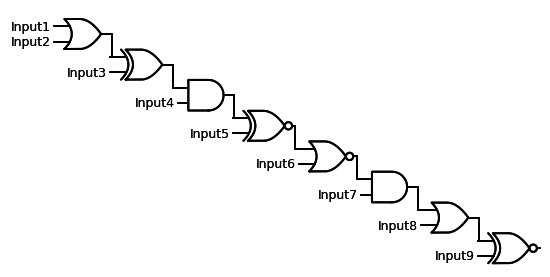

In [7]:
logic_circuits.draw_logic_circuits(ga.best)

## Resources

https://brilliant.org/wiki/genetic-algorithms/

https://www.geeksforgeeks.org/genetic-algorithms/

https://www.tutorialspoint.com/genetic_algorithms/

https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3